In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

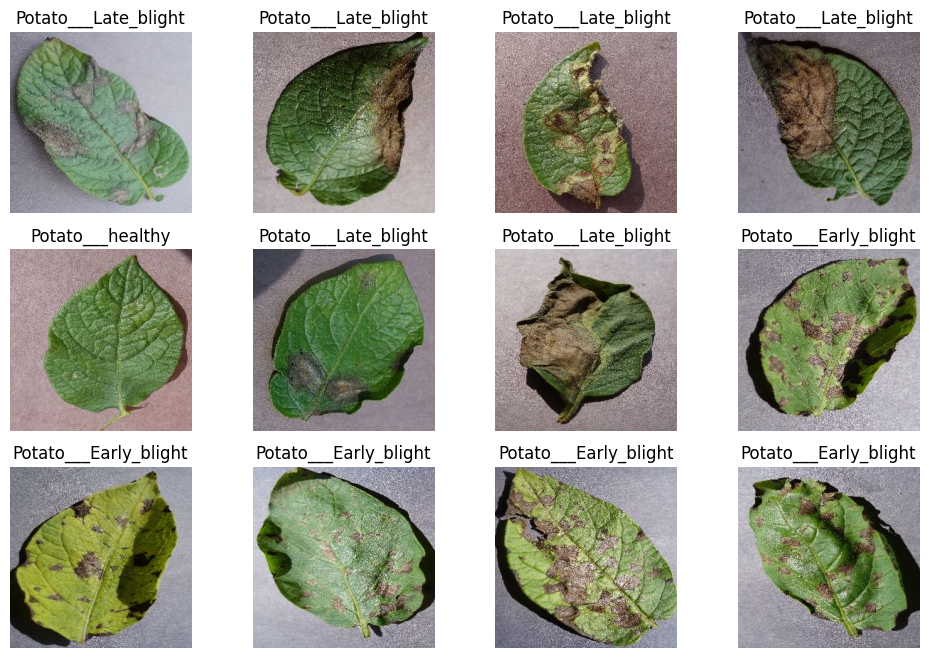

In [6]:
for image_batch, label_batch in dataset.take(1):
    num_images = min(12, len(image_batch))  # Show max 12 images
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])


In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed =12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history =  model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 133s 2s/step - loss: 3.0375 - accuracy: 0.5243 - val_loss: 0.9434 - val_accuracy: 0.6719
Epoch 2/50
54/54 [==============================] - 114s 2s/step - loss: 0.7167 - accuracy: 0.7188 - val_loss: 0.6730 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 112s 2s/step - loss: 0.5019 - accuracy: 0.8084 - val_loss: 0.5035 - val_accuracy: 0.8073
Epoch 4/50
54/54 [==============================] - 113s 2s/step - loss: 0.3477 - accuracy: 0.8663 - val_loss: 0.6277 - val_accuracy: 0.7552
Epoch 5/50
54/54 [==============================] - 178s 3s/step - loss: 0.3299 - accuracy: 0.8686 - val_loss: 0.6043 - val_accuracy: 0.7865
Epoch 6/50
54/54 [==============================] - 117s 2s/step - loss: 0.3642 - accuracy: 0.8623 - val_loss: 0.3900 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 117s 2s/step - loss: 0.2570 - accuracy: 0.8964 - val_loss: 0.4560 - val_accuracy: 0.7812
Epoch 8/50
54

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 15s 462ms/step - loss: 0.1683 - accuracy: 0.9570


In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.5243055820465088,
 0.71875,
 0.8084490895271301,
 0.8663194179534912,
 0.8686342835426331,
 0.8622685074806213,
 0.8964120149612427,
 0.90625,
 0.9305555820465088,
 0.9375,
 0.9473379850387573,
 0.9438657164573669,
 0.9577546119689941,
 0.9444444179534912,
 0.9502314925193787,
 0.9548611044883728,
 0.9537037014961243,
 0.9554398059844971,
 0.9606481194496155,
 0.953125,
 0.9571759104728699,
 0.9641203880310059,
 0.9664351940155029,
 0.9583333134651184,
 0.9548611044883728,
 0.9629629850387573,
 0.9618055820465088,
 0.9652777910232544,
 0.9658564925193787,
 0.9600694179534912,
 0.9635416865348816,
 0.9618055820465088,
 0.9768518805503845,
 0.9461805820465088,
 0.9612268805503845,
 0.9716435074806213,
 0.9733796119689941,
 0.984375,
 0.9814814925193787,
 0.9722222089767456,
 0.9756944179534912,
 0.9762731194496155,
 0.9762731194496155,
 0.9814814925193787,
 0.9768518805503845,
 0.9872685074806213,
 0.9872685074806213,
 0.9699074029922485,
 0.9832175970077515,
 0.9809027910232544]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


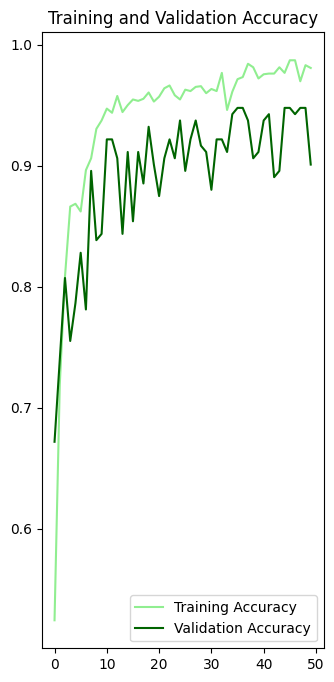

In [33]:
plt.figure(figsize=(8, 8))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='#90ee90')  # Light green
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='#006400')  # Dark green
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


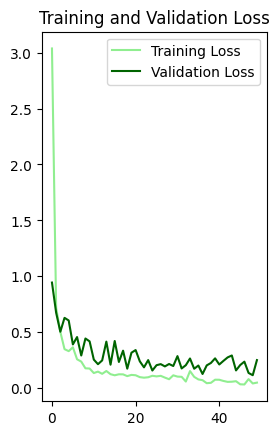

In [34]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='#90ee90')  # Light green
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='#006400')  # Dark green
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 760ms/step
predicted label: Potato___Early_blight


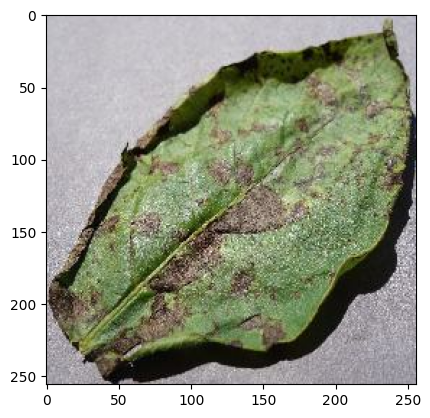

In [35]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 34ms/step


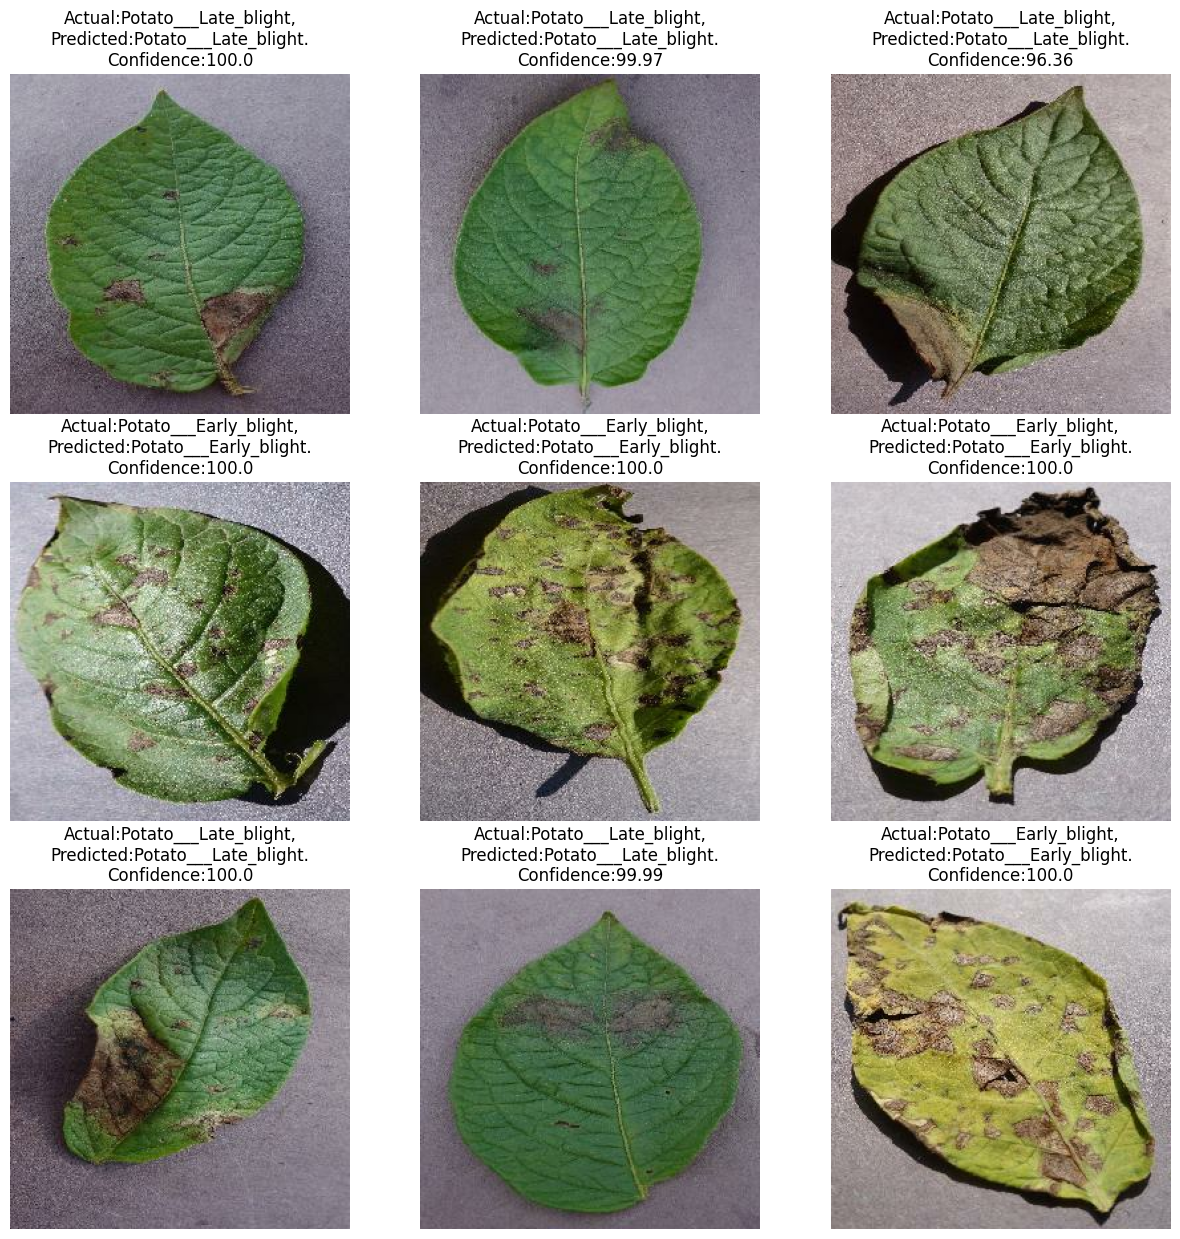

In [37]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\nPredicted:{predicted_class}.\nConfidence:{confidence}")
        plt.axis("off")

In [38]:
model.save("models/potato_disease_models.h5")